#### 1.1 [Загрузка изображения и data augmentation](#a001)
#### 1.2 [ImageGenerator, Аугментация](#a002)
#### 1.2 [CallBack ReduceLROnPlateau](#a003)

In [3]:
# Import

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

keras = tf.keras
L = keras.layers

#### 1. Загрузка изображения и Data augmentation <a name=a001></a>

In [5]:
import PIL

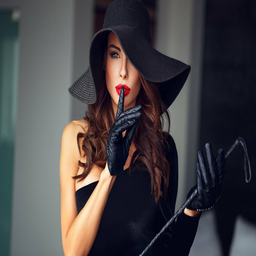

In [10]:
# downoload jpg
img_path = keras.utils.get_file('lady.jpg', 'https://avatars.mds.yandex.net/get-zen_doc/241223/pub_5d72cba432335400aec0e363_5d72cee7e882c300af10dadd/scale_1200')

# Открываем картинку
img = PIL.Image.open(img_path)

# Делаем ресайз
img_resized = img.resize((256,256), PIL.Image.LANCZOS)
img_resized

<a name='sd'></a>

In [29]:
np.array(img_resized).shape

(256, 256, 3)

#### Аугментация данных <a name=a002></a>

In [12]:
d = pd.DataFrame(data = [r"C:\Users\Дмитрий\.keras\datasets\lady.jpg", '1'], index = ['fname','class'])
d = d.T
d

,fname,class
0,C:\Users\Дмитрий\.keras\datasets\lady.jpg,1


In [93]:
# Создаем генератор

data_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255, 
                                                        rotation_range=15, # случайный поворот изображения
                                                        shear_range=0.9, # Задает диапазон сдвига пикселей изображения
                                                        zoom_range=0.2, #  Диапазон случайного выбора масштабирования изображения
                                                        horizontal_flip=True, # Горизонтальное отражение
                                                        width_shift_range=0.1, # Случайный сдвиг по ширине
                                                        height_shift_range=0.1) # Случайный сдвиг по высоте

In [95]:
data_gen.fit(np.array(img_resized)[np.newaxis,...])

In [96]:
generator = data_gen.flow_from_dataframe(d, x_col='fname', y_col='class',batch_size=20, class_mode='categorical')

Found 1 validated image filenames belonging to 1 classes.


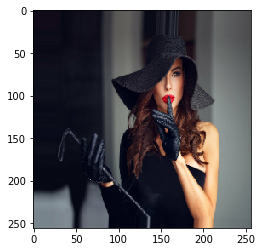

In [97]:
for x, y in generator:
    plt.imshow(x[0])
    break

#### ReduceLROnPlateau<a name=a003></a>

In [257]:
callback = keras.callbacks.ReduceLROnPlateau(patience=5, verbose=1, monitor = 'val_loss', factor=0.5)

In [258]:
from sklearn.model_selection import train_test_split
(x_train, y_train), (x, y) = keras.datasets.fashion_mnist.load_data()
x_test, x_val, y_test, y_val = train_test_split(x,y, test_size=0.5)


In [283]:
m = keras.Sequential(name = 'name')
m.add(L.Input(shape = (28,28)))
m.add(L.Flatten())
m.add(L.Dense(256, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
m.add(L.BatchNormalization())
m.add(L.Dense(64, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
m.add(L.BatchNormalization())
m.add(L.Dense(10, activation='softmax', kernel_initializer=keras.initializers.he_uniform()))
m.summary()
m.compile(loss='sparse_categorical_crossentropy', metrics=['acc'], optimizer='adam')

Model: "name"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_48 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dense_49 (Dense)             (None, 10)                650       
Total params: 219,338
Trainable params: 218,698
Non-trainable params: 640
______________________________________________________

In [284]:
hist = m.fit(x = x_train, y = y_train, batch_size=100, epochs=30, validation_data=(x_test, y_test), verbose=1, callbacks=[callback])

Train on 60000 samples, validate on 5000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4589 - acc: 0.8361 - val_loss: 0.4108 - val_acc: 0.8520
Epoch 2/30
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3607 - acc: 0.8697 - val_loss: 0.4131 - val_acc: 0.8512
Epoch 3/30
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3265 - acc: 0.8795 - val_loss: 0.4216 - val_acc: 0.8574
Epoch 4/30
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3049 - acc: 0.8884 - val_loss: 0.4003 - val_acc: 0.8612
Epoch 5/30
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2918 - acc: 0.8932 - val_loss: 0.3645 - val_acc: 0.8684
Epoch 6/30
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2764 - acc: 0.8976 - val_loss: 0.3449 - val_acc: 0.8830
Epoch 7/30
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2637 - acc: 0.9024 - val_loss: 0.3